<a href="https://colab.research.google.com/github/Aniket-desai-24/Machine-Learning/blob/main/Human_Activity_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd

In [5]:
df=pd.read_csv('/content/drive/MyDrive/Activities_Dataset.csv')
df.sample(10)

,timestamp,activityID,heart_rate,hand temperature (°C),hand acceleration X ±16g,hand acceleration Y ±16g,hand acceleration Z ±16g,hand acceleration X scale: ±6g,hand acceleration Y scale: ±6g,hand acceleration Z scale: ±6g,...,ankle gyroscope Y,ankle gyroscope Z,ankle magnetometer X,ankle magnetometer Y,ankle magnetometer Z,orientation A.2,orientation B.2,orientation C.2,orientation D.2,PeopleId
2177848,360.14,transient activities,91.0,31.4375,-10.89400,1.260120,2.605260,-11.22120,1.51997,2.750260,...,-0.170835,1.968810,-73.5352,-45.21510,-21.491100,0.600442,0.105189,0.637480,0.471194,7
2738964,2835.28,cycling,126.0,31.3125,-9.51961,0.373491,6.477580,-7.06348,2.18718,5.447580,...,-0.236813,0.011564,-25.2446,16.52330,32.928900,0.165682,0.671683,-0.396727,0.603323,8
2314383,1725.49,ascending stairs,103.0,33.6875,-11.68730,7.316110,0.263707,-11.22010,7.46815,0.472110,...,0.715913,-0.467999,-75.8418,2.72832,0.145496,0.601654,0.042696,0.796616,0.039910,7
63157,639.95,standing,105.0,32.9375,-8.39225,3.524880,3.481820,-8.30216,3.58390,3.694100,...,0.006775,0.008237,-79.8349,-12.42080,54.682900,1.000000,0.000000,0.000000,0.000000,1
14443,152.81,lying,86.0,31.2500,1.66133,9.497460,1.341510,1.09990,9.11684,1.392140,...,0.171999,0.014069,-28.0210,31.70710,24.899200,1.000000,0.000000,0.000000,0.000000,1
2314974,1731.40,ascending stairs,109.0,33.6875,-7.39036,11.210200,2.470230,-6.91081,8.63058,0.963481,...,0.776793,0.278925,-30.5865,1.10248,39.594100,0.159293,-0.875781,0.257516,-0.375923,7
2247650,1058.16,ironing,71.0,33.8750,-3.04188,-0.988224,8.388110,-3.20481,-1.12980,8.848570,...,-0.021870,0.041944,-29.7061,6.88140,49.518700,0.058944,0.801432,-0.005641,0.595147,7
54113,549.51,standing,104.0,32.6875,2.64478,8.600710,3.745480,2.62516,8.68541,4.003960,...,-0.004347,-0.004441,-85.0636,38.53110,-5.506190,1.000000,0.000000,0.000000,0.000000,1
982234,1593.81,transient activities,100.0,33.1875,-5.08998,4.695530,1.525990,-5.01131,4.40400,1.680530,...,-0.238088,-0.862024,-43.7839,-12.05790,22.580800,0.685055,-0.035100,0.723373,0.078729,3
418207,423.54,sitting,77.0,33.8125,-1.74971,6.691780,7.034500,-1.50875,6.64937,7.365020,...,0.002139,-0.012023,-14.7666,-4.45452,20.939200,0.038411,-0.705675,0.232091,-0.668342,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864056 entries, 0 to 2864055
Data columns (total 55 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   timestamp                        float64
 1   activityID                       object 
 2   heart_rate                       float64
 3   hand temperature (°C)            float64
 4   hand acceleration X ±16g         float64
 5   hand acceleration Y ±16g         float64
 6   hand acceleration Z ±16g         float64
 7   hand acceleration X scale: ±6g   float64
 8   hand acceleration Y scale: ±6g   float64
 9   hand acceleration Z scale: ±6g   float64
 10  hand gyroscope X                 float64
 11  hand gyroscope Y                 float64
 12  hand gyroscope Z                 float64
 13  hand magnetometer X              float64
 14  hand magnetometer Y              float64
 15  hand magnetometer Z              float64
 16  orientation A                    float64
 17  orientat

In [7]:
df.describe()

,timestamp,heart_rate,hand temperature (°C),hand acceleration X ±16g,hand acceleration Y ±16g,hand acceleration Z ±16g,hand acceleration X scale: ±6g,hand acceleration Y scale: ±6g,hand acceleration Z scale: ±6g,hand gyroscope X,...,ankle gyroscope Y,ankle gyroscope Z,ankle magnetometer X,ankle magnetometer Y,ankle magnetometer Z,orientation A.2,orientation B.2,orientation C.2,orientation D.2,PeopleId
count,2.864056e+06,2.864010e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,...,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06
mean,1.839612e+03,1.097703e+02,3.267050e+01,-4.978788e+00,3.575225e+00,3.174904e+00,-4.907341e+00,3.571269e+00,3.356876e+00,-3.881062e-03,...,-3.430653e-02,6.899129e-03,-3.272317e+01,1.635810e+00,1.691927e+01,3.983593e-01,2.307841e-02,3.084688e-01,-1.780717e-02,4.487160e+00
std,1.103085e+03,2.583130e+01,1.800771e+00,5.989589e+00,6.260608e+00,3.828842e+00,5.997846e+00,6.034495e+00,3.825168e+00,1.298024e+00,...,5.953280e-01,1.842663e+00,1.888977e+01,2.159774e+01,2.031745e+01,3.037780e-01,5.692146e-01,3.237648e-01,4.734691e-01,2.357792e+00
min,5.640000e+00,5.700000e+01,2.743750e+01,-1.453670e+02,-1.043010e+02,-1.014520e+02,-6.148950e+01,-6.186800e+01,-6.193470e+01,-2.780440e+01,...,-1.812690e+01,-1.401960e+01,-1.728650e+02,-1.379080e+02,-1.092890e+02,-2.536280e-01,-9.568760e-01,-8.768380e-01,-9.972810e-01,1.000000e+00
25%,9.011100e+02,9.000000e+01,3.143750e+01,-9.038570e+00,1.294029e+00,9.735957e-01,-8.941360e+00,1.288088e+00,1.172017e+00,-3.477418e-01,...,-8.216113e-02,-3.097942e-01,-4.290010e+01,-1.140080e+01,3.293130e+00,1.560470e-01,-5.826533e-01,1.005855e-02,-5.052722e-01,2.000000e+00
50%,1.796130e+03,1.080000e+02,3.312500e+01,-5.818260e+00,3.568640e+00,2.961145e+00,-5.767355e+00,3.612080e+00,3.136205e+00,-6.158165e-03,...,-4.229060e-03,-2.273390e-03,-3.389515e+01,1.419830e+00,1.816660e+01,3.185305e-01,0.000000e+00,3.029610e-01,0.000000e+00,5.000000e+00
75%,2.713600e+03,1.250000e+02,3.400000e+01,-8.020333e-01,6.588192e+00,5.996195e+00,-7.441507e-01,6.591070e+00,6.250245e+00,3.030542e-01,...,8.283495e-02,6.281400e-02,-1.905550e+01,1.734970e+01,3.091070e+01,5.797773e-01,6.292903e-01,6.014770e-01,4.648022e-01,7.000000e+00
max,4.475630e+03,2.020000e+02,3.550000e+01,6.285960e+01,1.556990e+02,1.569490e+02,5.282140e+01,6.225980e+01,6.194460e+01,2.641580e+01,...,1.358820e+01,1.652880e+01,9.752550e+01,1.233060e+02,1.469000e+02,1.000000e+00,9.595380e-01,9.923540e-01,9.961050e-01,8.000000e+00


In [8]:
df.isnull().sum()

timestamp                           0
activityID                          0
heart_rate                         46
hand temperature (°C)               0
hand acceleration X ±16g            0
hand acceleration Y ±16g            0
hand acceleration Z ±16g            0
hand acceleration X scale: ±6g      0
hand acceleration Y scale: ±6g      0
hand acceleration Z scale: ±6g      0
hand gyroscope X                    0
hand gyroscope Y                    0
hand gyroscope Z                    0
hand magnetometer X                 0
hand magnetometer Y                 0
hand magnetometer Z                 0
orientation A                       0
orientation B                       0
orientation C                       0
orientation D                       0
chest temperature (°C)              0
chest acceleration X ±16g           0
chest acceleration Y ±16g           0
chest acceleration Z ±16g           0
chest acceleration X scale: ±6g     0
chest acceleration Y scale: ±6g     0
chest accele

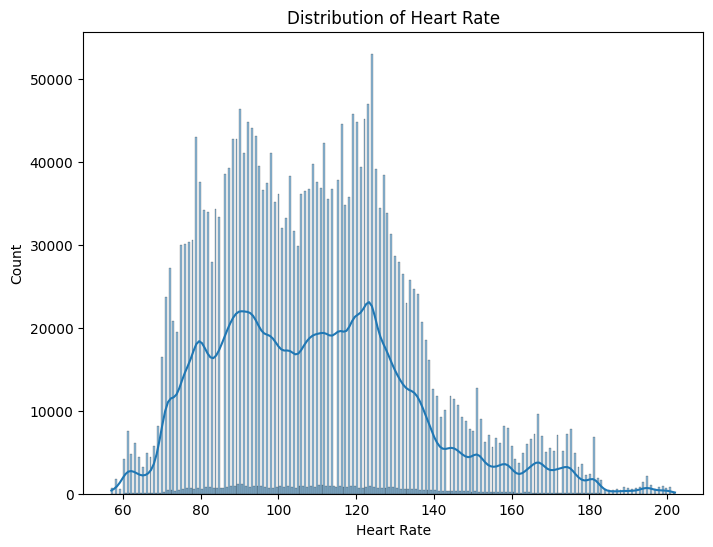

In [9]:
# Plot the distribution of heart rate
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.histplot(df['heart_rate'], kde=True)
plt.xlabel('Heart Rate')
plt.ylabel('Count')
plt.title('Distribution of Heart Rate')
plt.show()

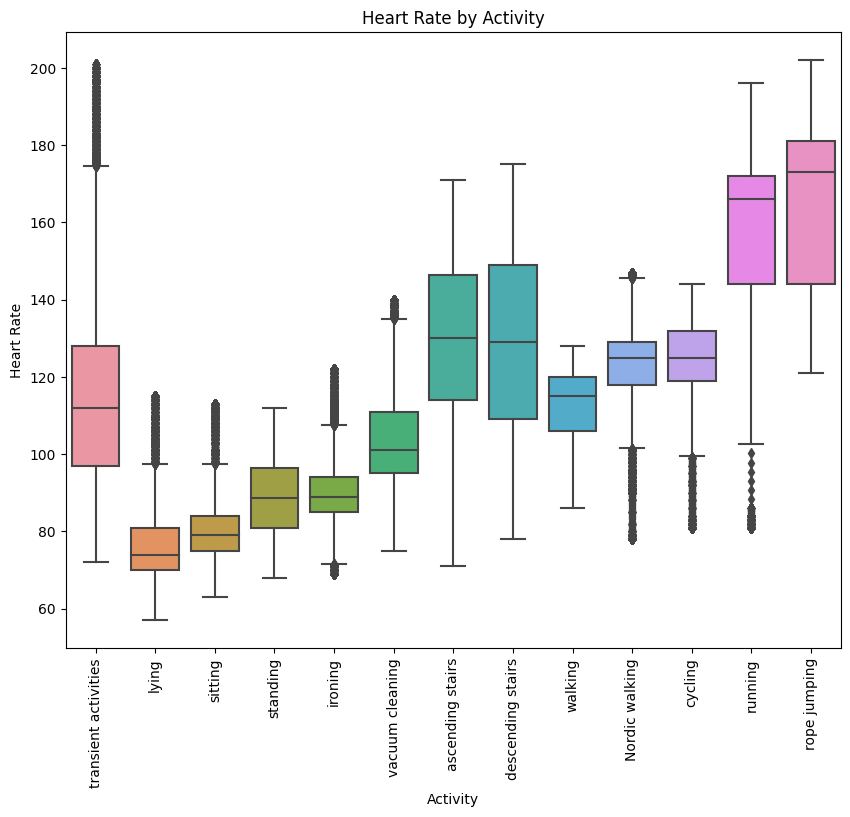

In [10]:
# Box plot of heart rate by activity
plt.figure(figsize=(10, 8))
sns.boxplot(x='activityID', y='heart_rate', data=df)
plt.xlabel('Activity')
plt.ylabel('Heart Rate')
plt.title('Heart Rate by Activity')
plt.xticks(rotation=90)
plt.show()


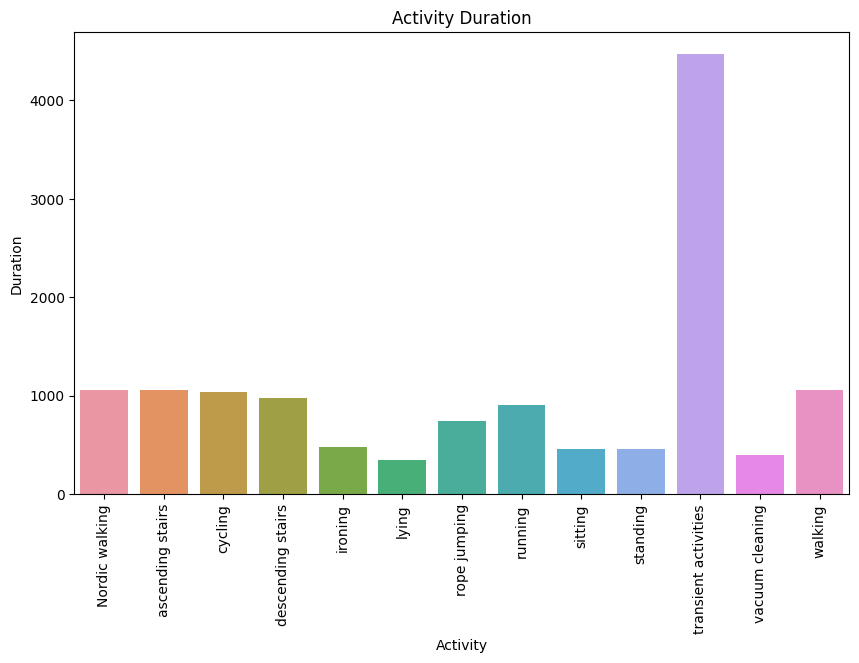

In [11]:
# Bar plot of activity duration
activity_duration = df.groupby('activityID')['timestamp'].max() - df.groupby('activityID')['timestamp'].min()
plt.figure(figsize=(10, 6))
sns.barplot(x=activity_duration.index, y=activity_duration.values)
plt.xlabel('Activity')
plt.ylabel('Duration')
plt.title('Activity Duration')
plt.xticks(rotation=90)
plt.show()


<ipython-input-12-0deb35849806>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


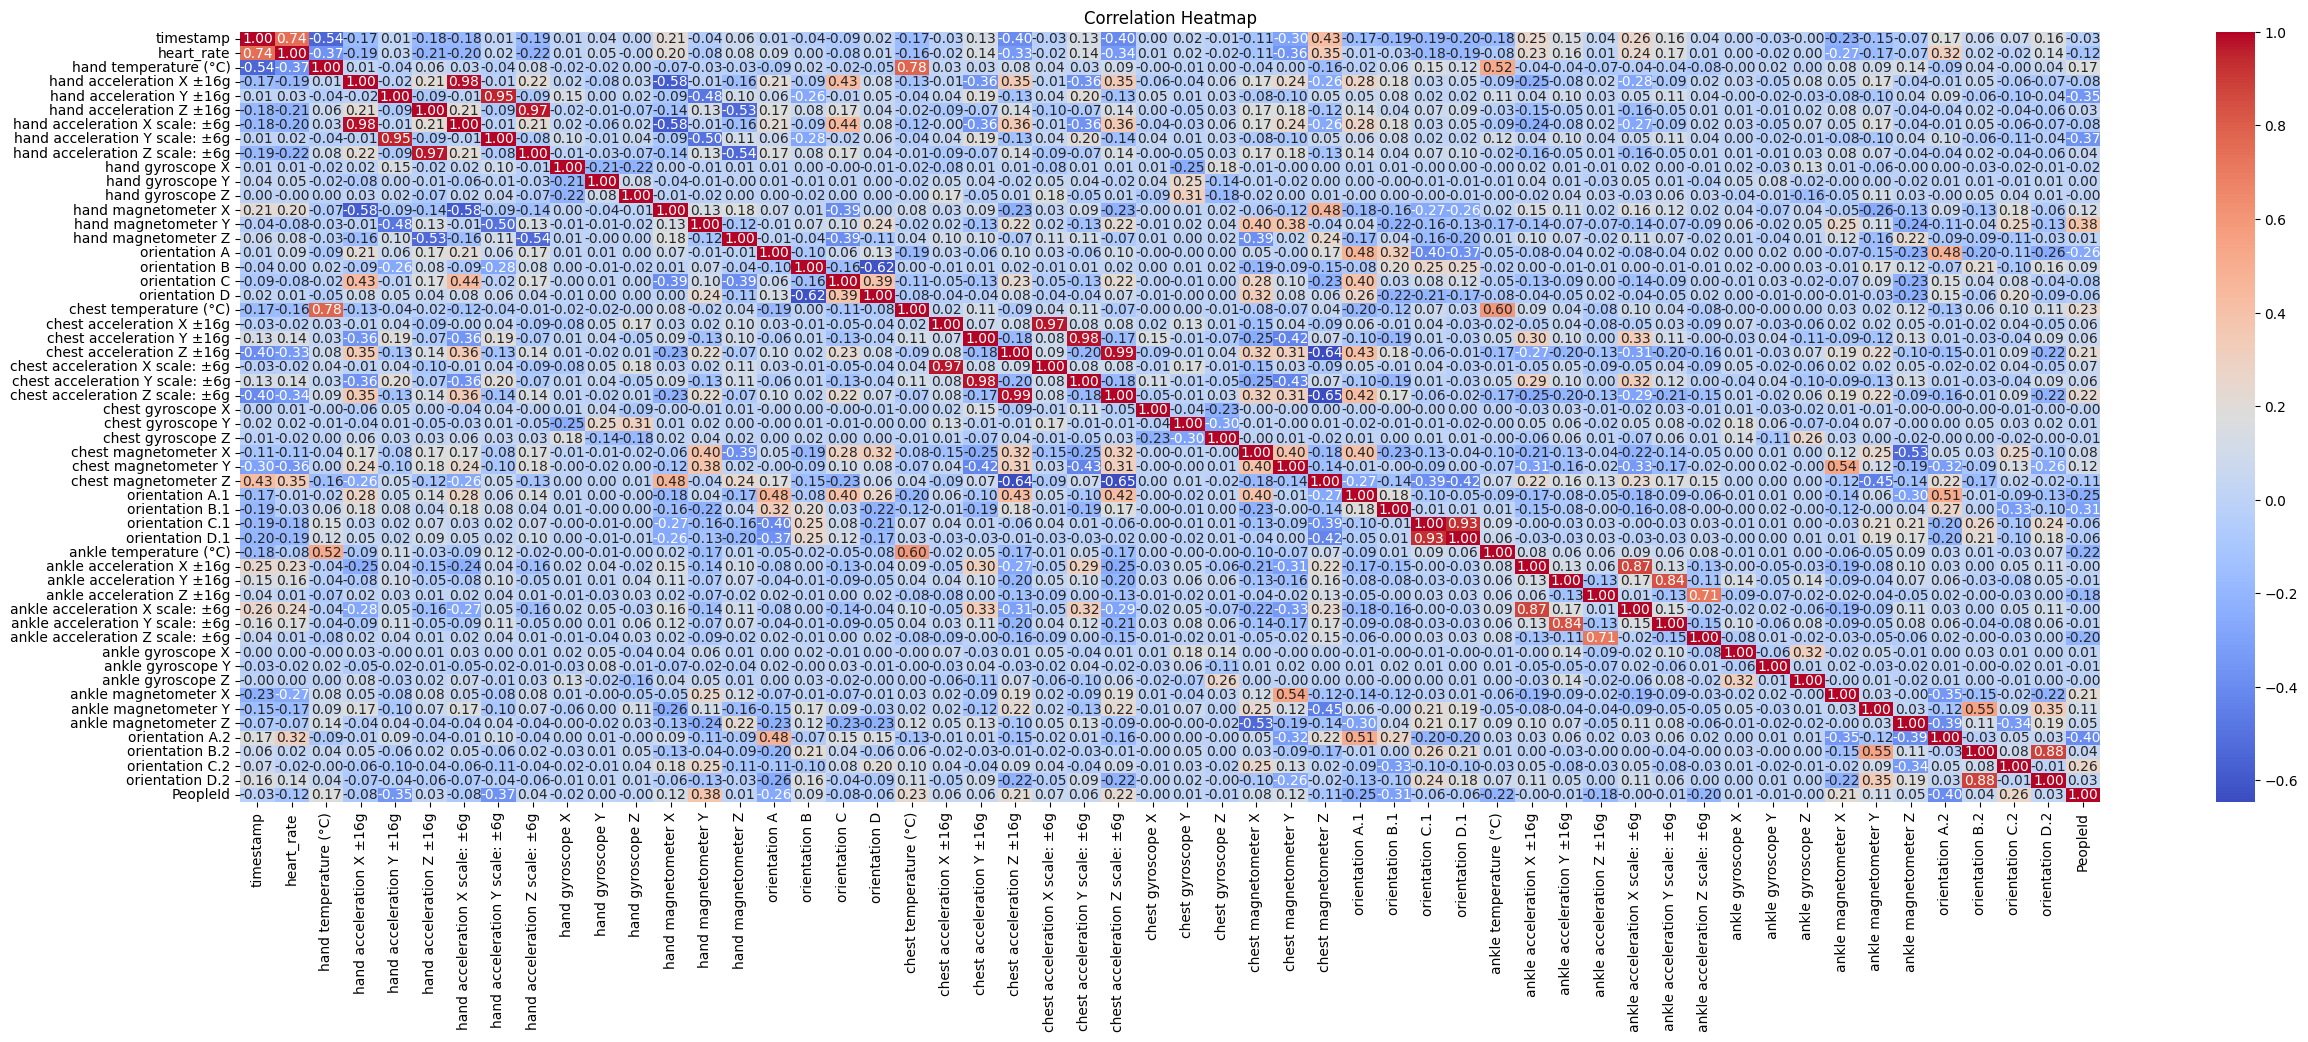

In [12]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(30, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


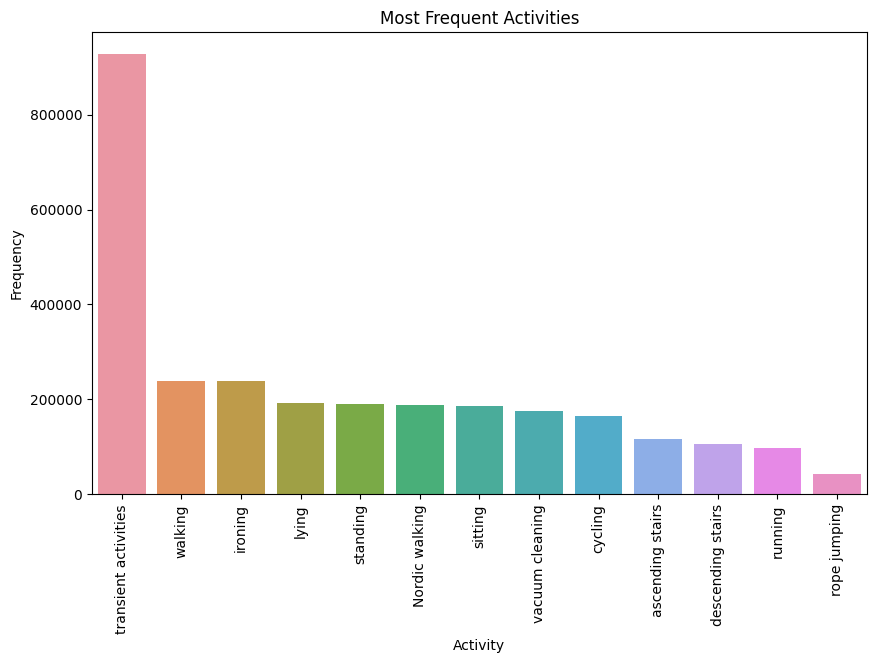

In [13]:
# Countplot of activity frequency
plt.figure(figsize=(10, 6))
sns.countplot(x='activityID', data=df, order=df['activityID'].value_counts().index)
plt.xlabel('Activity')
plt.ylabel('Frequency')
plt.title('Most Frequent Activities')
plt.xticks(rotation=90)
plt.show()


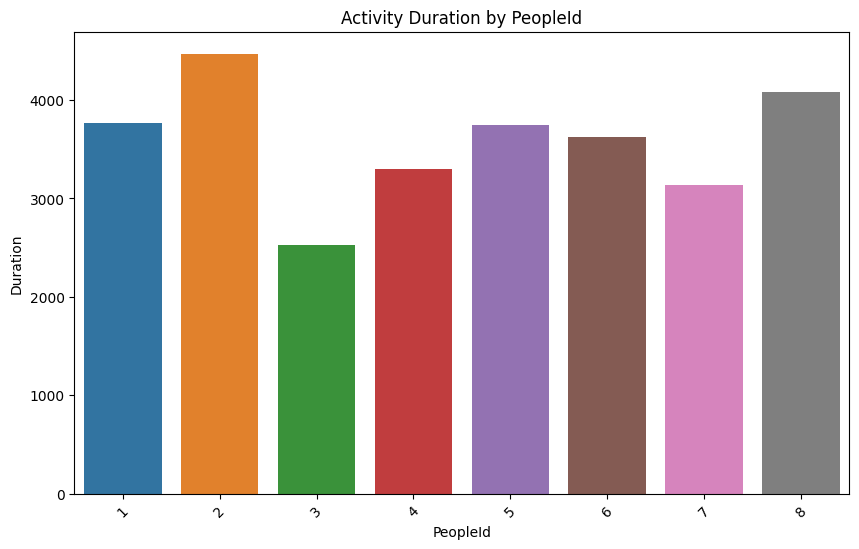

In [14]:
# Bar plot of activity duration by PeopleId
activity_duration_by_people = df.groupby('PeopleId')['timestamp'].max() - df.groupby('PeopleId')['timestamp'].min()
plt.figure(figsize=(10, 6))
sns.barplot(x=activity_duration_by_people.index, y=activity_duration_by_people.values)
plt.xlabel('PeopleId')
plt.ylabel('Duration')
plt.title('Activity Duration by PeopleId')
plt.xticks(rotation=45)
plt.show()


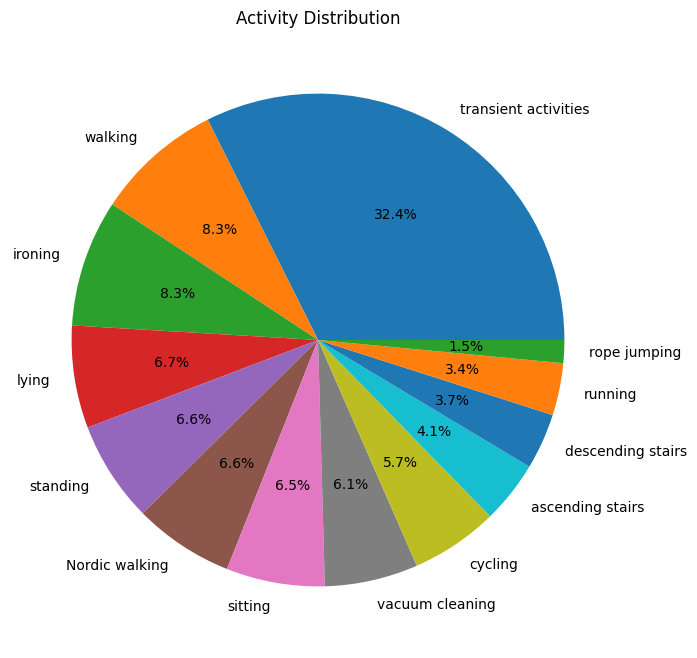

In [15]:
# Pie chart of activity distribution
activity_counts = df['activityID'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(activity_counts, labels=activity_counts.index, autopct='%1.1f%%')
plt.title('Activity Distribution')
plt.show()


<Figure size 1200x600 with 0 Axes>

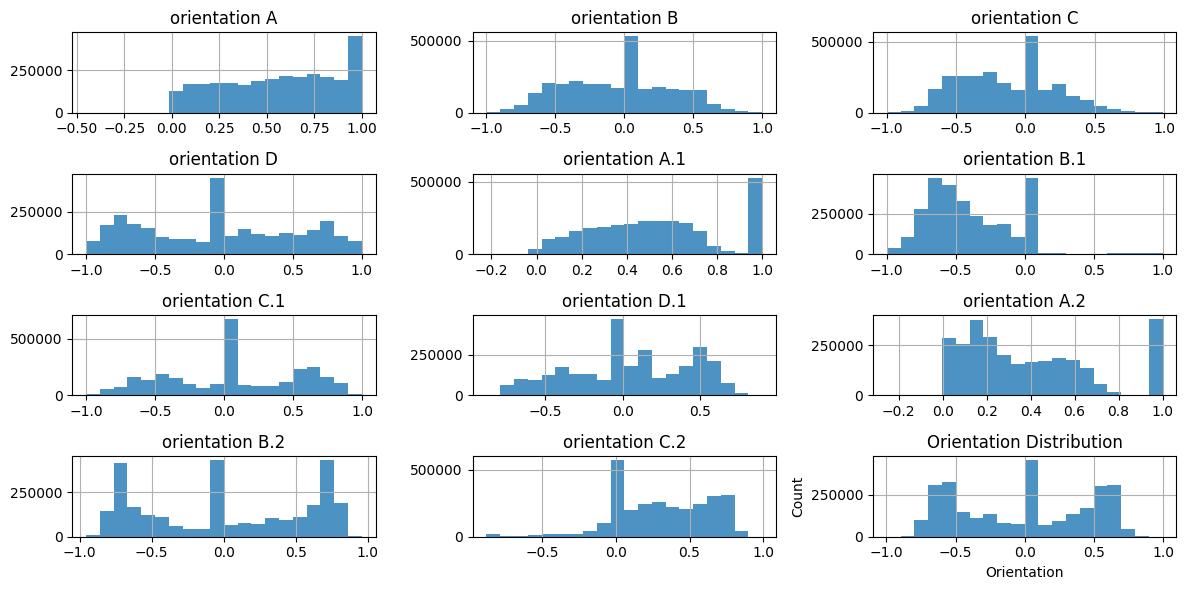

In [16]:
# Histogram of orientation distribution
orientation_cols = [col for col in df.columns if col.startswith('orientation')]
orientation_data = df[orientation_cols]
plt.figure(figsize=(12, 6))
orientation_data.hist(bins=20, figsize=(12, 6), alpha=0.8)
plt.xlabel('Orientation')
plt.ylabel('Count')
plt.title('Orientation Distribution')
plt.tight_layout()
plt.show()


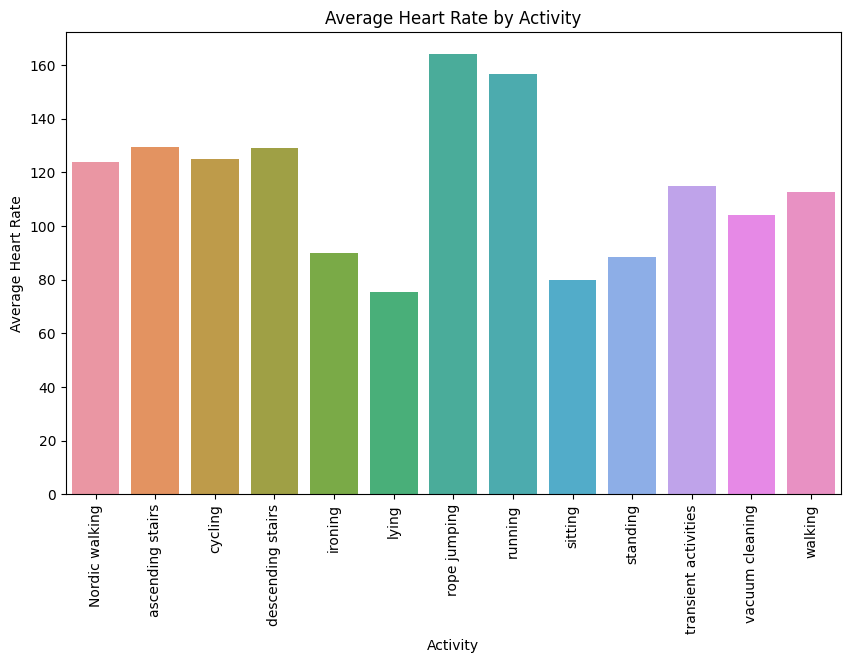

In [17]:
# Bar plot of average heart rate by activity
avg_heart_rate_by_activity = df.groupby('activityID')['heart_rate'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_heart_rate_by_activity.index, y=avg_heart_rate_by_activity.values)
plt.xlabel('Activity')
plt.ylabel('Average Heart Rate')
plt.title('Average Heart Rate by Activity')
plt.xticks(rotation=90)
plt.show()

In [18]:
'''# Define function to remove outliers using IQR method
def remove_outliers_iqr(df, column, k=1.5):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - k * iqr
    upper_bound = q3 + k * iqr
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for each numeric column
numeric_cols = ['heart_rate', 'hand temperature (°C)', 'hand acceleration X ±16g', 'hand acceleration Y ±16g',
                'hand acceleration Z ±16g', 'ankle gyroscope X', 'ankle gyroscope Y', 'ankle gyroscope Z',
                'ankle magnetometer X', 'ankle magnetometer Y', 'ankle magnetometer Z']
data_no_outliers = df.copy()
for column in numeric_cols:
    data_no_outliers = remove_outliers_iqr(data_no_outliers, column)

# Display the resulting dataframe without outliers
print(data_no_outliers)'''


"# Define function to remove outliers using IQR method\ndef remove_outliers_iqr(df, column, k=1.5):\n    q1 = df[column].quantile(0.25)\n    q3 = df[column].quantile(0.75)\n    iqr = q3 - q1\n    lower_bound = q1 - k * iqr\n    upper_bound = q3 + k * iqr\n    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]\n\n# Remove outliers for each numeric column\nnumeric_cols = ['heart_rate', 'hand temperature (°C)', 'hand acceleration X ±16g', 'hand acceleration Y ±16g',\n                'hand acceleration Z ±16g', 'ankle gyroscope X', 'ankle gyroscope Y', 'ankle gyroscope Z',\n                'ankle magnetometer X', 'ankle magnetometer Y', 'ankle magnetometer Z']\ndata_no_outliers = df.copy()\nfor column in numeric_cols:\n    data_no_outliers = remove_outliers_iqr(data_no_outliers, column)\n\n# Display the resulting dataframe without outliers\nprint(data_no_outliers)"

In [19]:
'''data_no_outliers = data_no_outliers.reset_index(drop=True)
data_no_outliers'''

'data_no_outliers = data_no_outliers.reset_index(drop=True)\ndata_no_outliers'

In [ ]:
'''# Calculate the correlation matrix
corr_matrix = data_no_outliers.corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(30, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()'''

In [ ]:
'''df['heart_rate'].fillna(data_no_outliers['heart_rate'].mean(), inplace=True)'''

In [ ]:
'''class_frequencies = data_no_outliers['activityID'].value_counts()

# Calculate the proportions
class_proportions = data_no_outliers['activityID'].value_counts(normalize=True)

# Print the class frequencies
print("Class frequencies:")
print(class_frequencies)

# Print the class proportions
print("\nClass proportions:")
print(class_proportions)'''

In [23]:

corr_matrix=df.corr()


<ipython-input-23-a4bfebfd3231>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


In [25]:
'''import pandas as pd
from imblearn.over_sampling import SMOTE

# Assuming you have a DataFrame 'df' with a column 'activity' containing the activity labels
# and a column 'features' containing the corresponding feature vectors

# Separate the features and labels
X = data_no_outliers.drop('activityID',axis=1)
y = data_no_outliers['activityID']'''

"import pandas as pd\nfrom imblearn.over_sampling import SMOTE\n\n# Assuming you have a DataFrame 'df' with a column 'activity' containing the activity labels\n# and a column 'features' containing the corresponding feature vectors\n\n# Separate the features and labels\nX = data_no_outliers.drop('activityID',axis=1)\ny = data_no_outliers['activityID']"

In [26]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
import numpy as np

# Assuming you have a DataFrame 'df' with a column 'activityID' containing the activity labels
# and a column 'features' containing the corresponding feature vectors

# Separate the features and labels
X = df.drop('activityID', axis=1)
y = df['activityID']

# Reshape the feature vectors to be one-dimensional arrays
X = np.array(X.values.tolist())

# Apply undersampling
undersampler = RandomUnderSampler()
X_resampled, y_resampled = undersampler.fit_resample(X, y)



In [27]:
feature_columns = df.columns[df.columns != 'activityID']
resampled_df = pd.DataFrame(X_resampled, columns=feature_columns)
resampled_df['activityID'] = y_resampled

In [28]:
new_df=resampled_df.copy()
new_df.to_csv("Cleaned_Human_Activity_prediction.csv",index=False)

In [33]:
resampled_df=resampled_df.dropna(axis=1)

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Step 1: Load the dataset

# Step 2: Data preprocessing
# Handle missing values if any

# Encode categorical variables if any

# Split the data into features (X) and target variable (y)
X = resampled_df.drop(['activityID'], axis=1)
y = resampled_df['activityID']

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Choose a machine learning algorithm
model = RandomForestClassifier()

# Step 5: Train the model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
model.fit(X_train_scaled, y_train)

# Step 6: Evaluate the model's performance
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


#new_data = pd.DataFrame(...)  # Provide new data for prediction
#new_data_scaled = scaler.transform(new_data)
#predictions = model.predict(new_data_scaled)


                      precision    recall  f1-score   support

      Nordic walking       1.00      1.00      1.00      8562
    ascending stairs       1.00      1.00      1.00      8693
             cycling       1.00      1.00      1.00      8472
   descending stairs       1.00      1.00      1.00      8603
             ironing       1.00      1.00      1.00      8772
               lying       1.00      1.00      1.00      8585
        rope jumping       1.00      1.00      1.00      8449
             running       1.00      1.00      1.00      8545
             sitting       1.00      1.00      1.00      8657
            standing       1.00      1.00      1.00      8623
transient activities       1.00      0.99      0.99      8613
     vacuum cleaning       1.00      1.00      1.00      8487
             walking       1.00      1.00      1.00      8659

            accuracy                           1.00    111720
           macro avg       1.00      1.00      1.00    111720
      

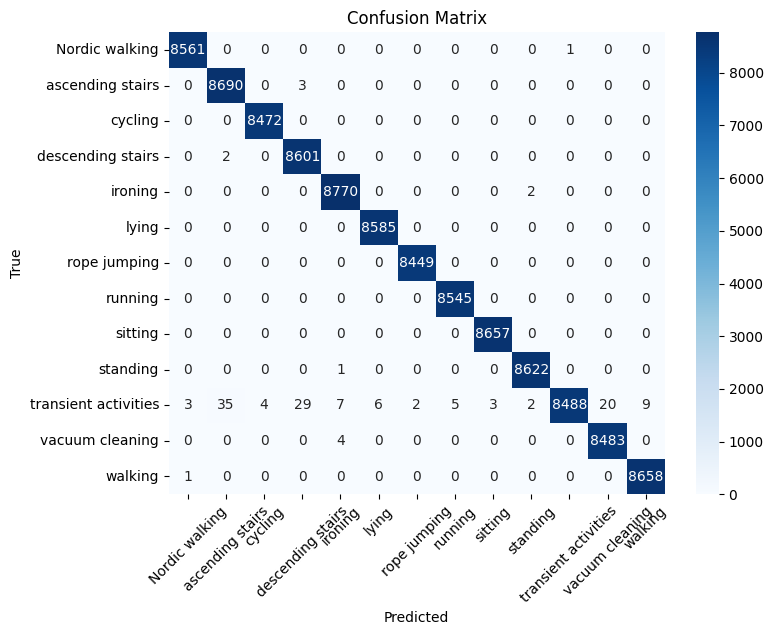

In [36]:
class_labels = np.unique(np.concatenate((y_test, y_pred)))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels, ax=ax)

# Set labels, title, and ticks
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')

# Rotate xticklabels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()